In [1]:
# Importação das bibliotecas
import pandas as pd
import matplotlib.pylab as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Importando os dados
dados = pd.read_csv('../Data/B3SA3.SA.csv', parse_dates = ['Date'], index_col='Date')
dados

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-02,3.250000,3.286666,3.216666,3.250000,2.060584,21306600
2012-01-03,3.283333,3.313333,3.253333,3.306666,2.096511,31713300
2012-01-04,3.283333,3.380000,3.270000,3.366666,2.134552,36529500
2012-01-05,3.336666,3.390000,3.293333,3.330000,2.111305,31424400
2012-01-06,3.336666,3.380000,3.310000,3.380000,2.143007,26978100
...,...,...,...,...,...,...
2022-12-23,12.340000,13.390000,12.320000,13.350000,13.057397,55312400
2022-12-26,13.360000,13.500000,13.130000,13.420000,13.125862,26468100
2022-12-27,13.460000,13.480000,12.840000,12.950000,12.666162,51364200


In [2]:
# Criação da série temporal
serieTemp = dados['Volume']
serieTemp.head()    

Date
2012-01-02    21306600
2012-01-03    31713300
2012-01-04    36529500
2012-01-05    31424400
2012-01-06    26978100
Name: Volume, dtype: int64

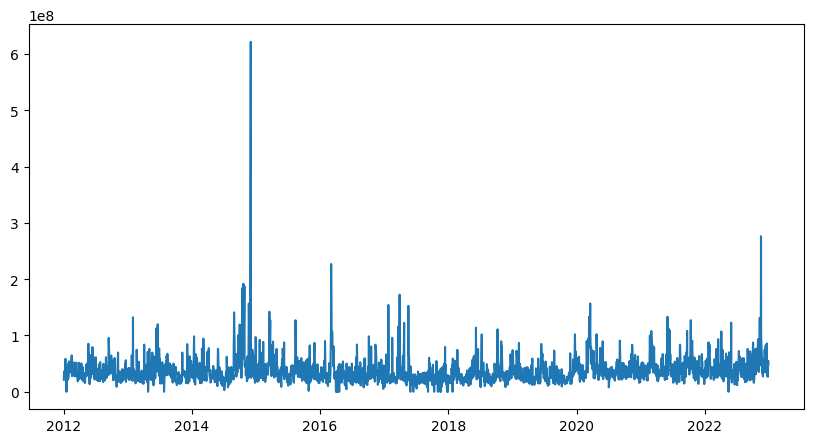

In [3]:
# Visualização da serie temporal
plt.figure(figsize=(10,5))
plt.plot(serieTemp)

In [4]:
# O maior volume da B3 no período
max_value = serieTemp.max()
max_value


621811002

In [5]:
# Data de maior volume de negociação
max_index = serieTemp.idxmax()
max_index

Timestamp('2014-12-02 00:00:00')

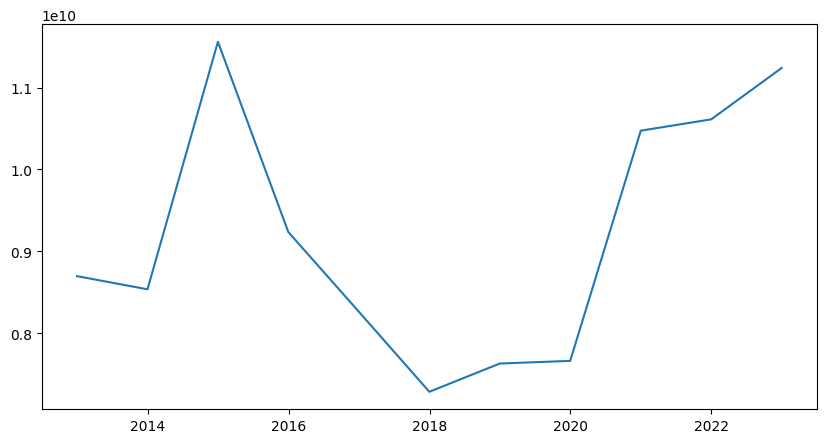

In [6]:
# Visualização dos valores por ano.
serieTempAno = serieTemp.resample('A').sum()
plt.figure(figsize=(10,5))
plt.plot(serieTempAno)


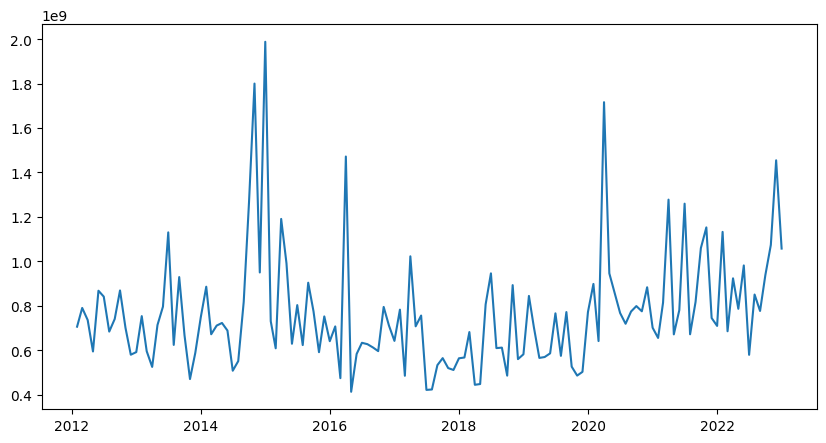

In [7]:
# Visulização dos valores por mês
serieTempMes = serieTemp.groupby(pd.Grouper(freq='M')).sum()
plt.figure(figsize=(10,5))
plt.plot(serieTempMes)

# Visualização dos valores móveis

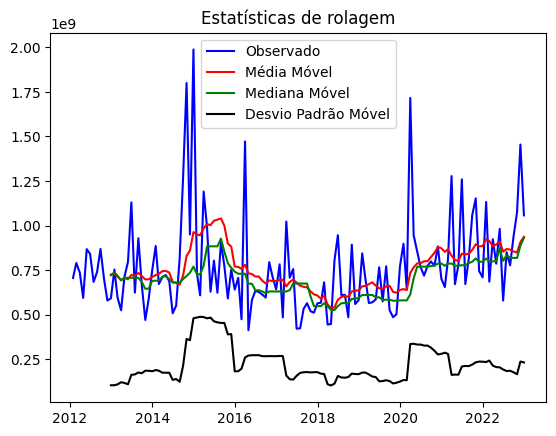

In [8]:
# Média móvel no tempo
media_movel = serieTempMes.rolling(12).mean()
# Desvio padrão móvel no tempo
desvio_movel = serieTempMes.rolling(12).std()
# Mediana móvel no tempo
mediana_movel = serieTempMes.rolling(12).median()
# Gráfico
orig = plt.plot(serieTempMes, color='blue', label='Observado')
media = plt.plot(media_movel, color='red', label='Média Móvel')

plt.plot(mediana_movel, color='green', label='Mediana Móvel')
desvio = plt.plot(desvio_movel, color='black', label='Desvio Padrão Móvel')
plt.legend(loc='best')
plt.title('Valores Móveis no Tempo')
plt.show(block=False)

# Autocorrelação

Por exemplo, considere uma série temporal que representa o preço de uma ação ao longo de vários dias. Se você quiser calcular o lag entre o preço de hoje e o preço de ontem, estará considerando um lag de um dia. Se calcular o lag entre o preço de hoje e o preço há uma semana, estará considerando um lag de sete dias.

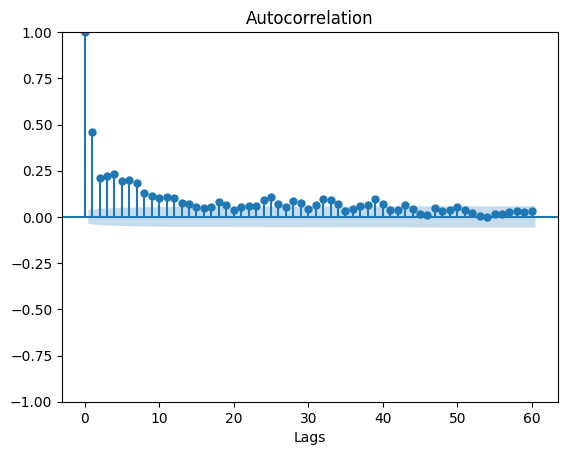

In [9]:
# A autocorrelação é uma medida de correlação entre uma série temporal e uma versão defasada de si mesma.
# O lag é o número de períodos que a série temporal é defasada, número de períodos anteriores usados ​​para calcular a autocorrelação.
# O lag 0 é a autocorrelação na defasagem 0, o que é sempre 1.
plot_acf(serieTemp.values, lags=60)
plt.xlabel('Lags')
plt.show()

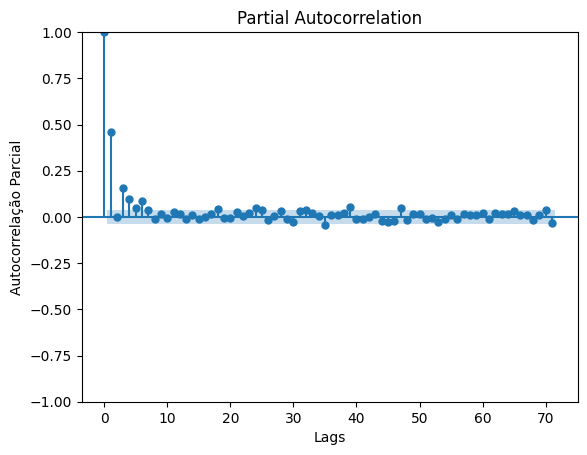

In [10]:
# A autocorrelação parcial é uma medida da correlação entre uma série temporal e uma versão defasada de si mesma, mas após remover os efeitos de correlações em defasagens intermediárias.
plot_pacf(serieTemp.values, lags=60)
plt.xlabel('Lags')
plt.ylabel('Autocorrelação Parcial')
plt.show()

# Decomposição da Série Temporal

A série temporal completa tem lacunas de dados, então vamos trabalhar com a série temporal mensal


In [11]:
# A decomposição de uma série temporal é uma técnica que permite separar diferentes componentes de uma série temporal.
decomposicao = seasonal_decompose(serieTempMes)

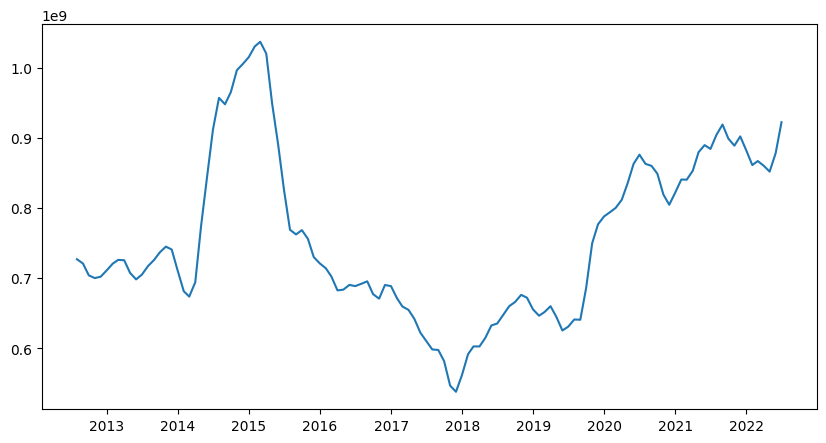

In [16]:
# Tendência de uma série temporal
tendencia = decomposicao.trend
plt.figure(figsize=(10,5))
plt.plot(tendencia)

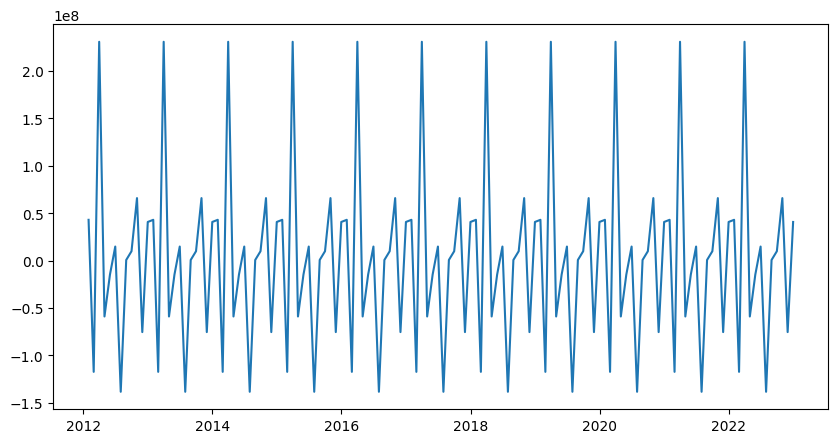

In [17]:
# Sazonal de uma série temporal
sazonal = decomposicao.seasonal
plt.figure(figsize=(10,5))
plt.plot(sazonal)

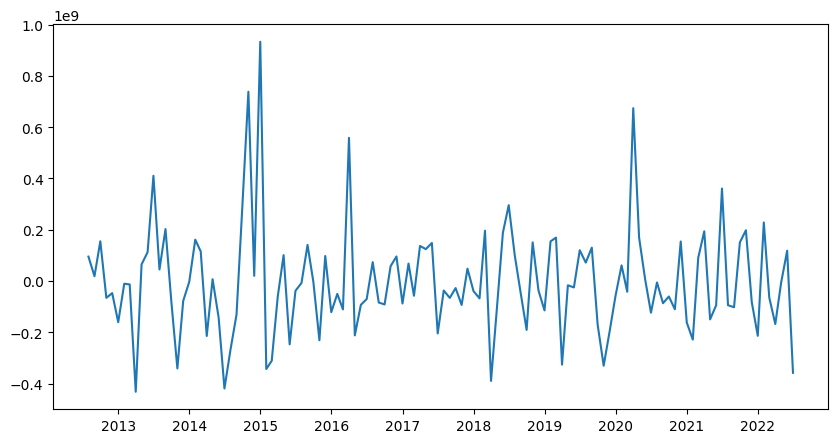

In [18]:
# Erro(Aleatório)
aleatorio = decomposicao.resid
plt.figure(figsize=(10,5))
plt.plot(aleatorio)


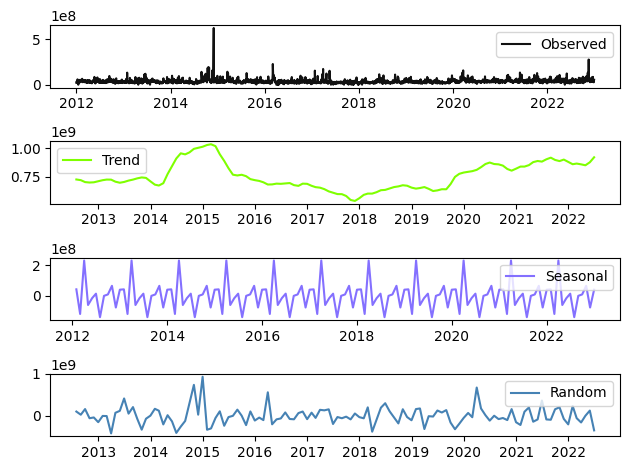

In [15]:
# Comparação da serie temporal com suas partes
plt.subplot(4,1,1)
plt.plot(serieTemp, label = 'Observed', color = '#111111')
plt.legend(loc = 'best')

# Visualização somente da tendência
plt.subplot(4,1,2)
plt.plot(tendencia, label = 'Trend', color='#7fff00')
plt.legend(loc = 'best')

# Visualização somente da sazonalidade
plt.subplot(4,1,3)
plt.plot(sazonal, label = 'Seasonal', color='#8470ff')
plt.legend(loc = 'best')

# Visualização somente do elemento aleatório
plt.subplot(4,1,4)
plt.plot(aleatorio, label = 'Random', color='#4682b4')
plt.legend(loc = 'best')
plt.tight_layout()